In [1]:
import geopandas as gpd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shapefile_path = r"/home/vedanshi/Documents/ML-hands-on/shp_rohit/alknanda.shp"
gdf = gpd.read_file(shapefile_path)
gdf=gdf.to_crs(4326)

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

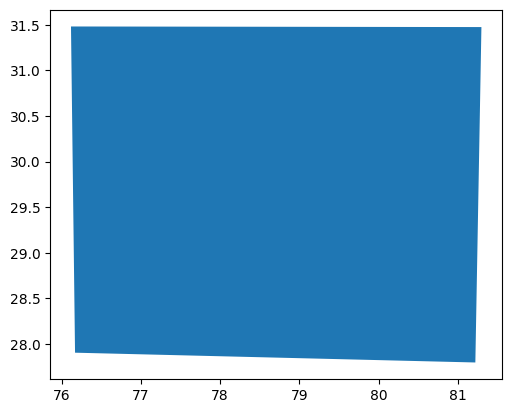

In [4]:
gdf.plot()

In [5]:
bound_box=gdf.total_bounds
minx,miny,maxx,maxy=bound_box

In [6]:
from shapely.geometry import box
# Create a rectangle from these coordinates using shapely's box function
rectangle = gpd.GeoSeries([box(minx, miny, maxx, maxy)], crs='epsg:4326')
# Print the rectangle coordinates
print(f"Bounding Box Coordinates: {bound_box}")
print(f"Rectangle Geometry: {rectangle}")

Bounding Box Coordinates: [76.11703155 27.79598912 81.29884383 31.48307196]
Rectangle Geometry: 0    POLYGON ((81.29884 27.79599, 81.29884 31.48307...
dtype: geometry


<Axes: >

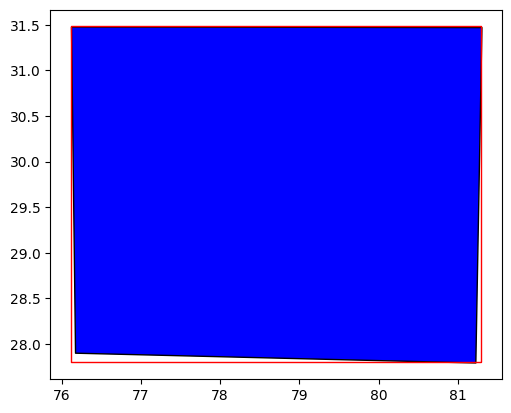

In [7]:
ax = gdf.plot(color='blue', edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red')

In [8]:
polygon=gdf.geometry[0]
coordinates = list(polygon.exterior.coords)
coordinates.remove(coordinates[4])
coordinates

[(81.29884382960824, 31.476528380639817),
 (81.22216592787854, 27.795989119659698),
 (76.16815971828309, 27.903402904818343),
 (76.1170315460337, 31.483071960344766)]

In [9]:
#changing the parameters to improve the fit of the box.
minx=76.16815971828309
miny=27.803402904818343
maxx=81.24216592787854

Bounding Box Coordinates: [76.11703155 27.79598912 81.29884383 31.48307196]
Rectangle Geometry: 0    POLYGON ((81.24217 27.80340, 81.24217 31.48307...
dtype: geometry


<Axes: >

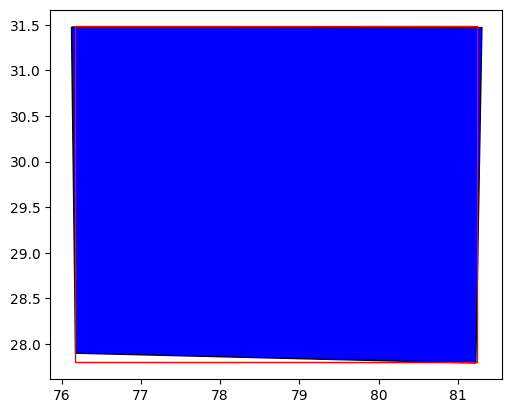

In [10]:
from shapely.geometry import box
# Create a rectangle from these coordinates using shapely's box function
rectangle = gpd.GeoSeries([box(minx, miny, maxx, maxy)], crs='epsg:4326')
# Print the rectangle coordinates
print(f"Bounding Box Coordinates: {bound_box}")
print(f"Rectangle Geometry: {rectangle}")
ax = gdf.plot(color='blue', edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red')

In [11]:
# using minx and maxx, i.e the boundary poits for the grid.
# initialize an empty list to store x-values for the custom grid
x_values = []
# generate x-values
current_x = minx
increment = 0.25 #this is an inceremnet of 0.25
while current_x <= maxx:
    x_values.append(current_x)  
    current_x += increment
len(x_values)

21

In [12]:
# using miny and maxy, i.e the boundary poits for the grid.
# initialize an empty list to store y-values for the custom grid
y_values = []
# generate y-values
current_y = miny
increment = 0.25 #this is an inceremnt of 0.25
while current_y <= maxy:
    y_values.append(current_y)  
    current_y += increment
len(y_values)

15

In [13]:
x_values = np.array(x_values, dtype=float) # x_values are the longitudes and y_values are the latitudes.
y_values = np.array(y_values, dtype=float)

In [14]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [24]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [round(loncell[i], 2), round(loncell[i], 2), round(loncell[i+1], 2), round(loncell[i+1], 2), round(loncell[i], 2)]
            y_coords = [round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2)] if dy > 0 else \
                       [round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2)]
            
            grid_cell[k] = {'Xc': round(lon, 2), 'Yc': round(lat, 2)}
            k += 1
    return grid_cell

In [25]:
if __name__ == "__main__":
    grid_cell = initialize_and_populate_grid(x_values, y_values)

In [26]:
grid_cell

[{'Xc': 76.17, 'Yc': 27.8},
 {'Xc': 76.17, 'Yc': 28.05},
 {'Xc': 76.17, 'Yc': 28.3},
 {'Xc': 76.17, 'Yc': 28.55},
 {'Xc': 76.17, 'Yc': 28.8},
 {'Xc': 76.17, 'Yc': 29.05},
 {'Xc': 76.17, 'Yc': 29.3},
 {'Xc': 76.17, 'Yc': 29.55},
 {'Xc': 76.17, 'Yc': 29.8},
 {'Xc': 76.17, 'Yc': 30.05},
 {'Xc': 76.17, 'Yc': 30.3},
 {'Xc': 76.17, 'Yc': 30.55},
 {'Xc': 76.17, 'Yc': 30.8},
 {'Xc': 76.17, 'Yc': 31.05},
 {'Xc': 76.17, 'Yc': 31.3},
 {'Xc': 76.42, 'Yc': 27.8},
 {'Xc': 76.42, 'Yc': 28.05},
 {'Xc': 76.42, 'Yc': 28.3},
 {'Xc': 76.42, 'Yc': 28.55},
 {'Xc': 76.42, 'Yc': 28.8},
 {'Xc': 76.42, 'Yc': 29.05},
 {'Xc': 76.42, 'Yc': 29.3},
 {'Xc': 76.42, 'Yc': 29.55},
 {'Xc': 76.42, 'Yc': 29.8},
 {'Xc': 76.42, 'Yc': 30.05},
 {'Xc': 76.42, 'Yc': 30.3},
 {'Xc': 76.42, 'Yc': 30.55},
 {'Xc': 76.42, 'Yc': 30.8},
 {'Xc': 76.42, 'Yc': 31.05},
 {'Xc': 76.42, 'Yc': 31.3},
 {'Xc': 76.67, 'Yc': 27.8},
 {'Xc': 76.67, 'Yc': 28.05},
 {'Xc': 76.67, 'Yc': 28.3},
 {'Xc': 76.67, 'Yc': 28.55},
 {'Xc': 76.67, 'Yc': 28.8},
 {'X

In [30]:
xc=[i['Xc']for i in grid_cell]
yc=[i['Yc']for i in grid_cell]
x,y=np.meshgrid(xc,yc)


In [ ]:
#def res_change(input_res,output_res):   